## Is Your Sex More Likely to Develop Exercised Induced Angina (EIA)?

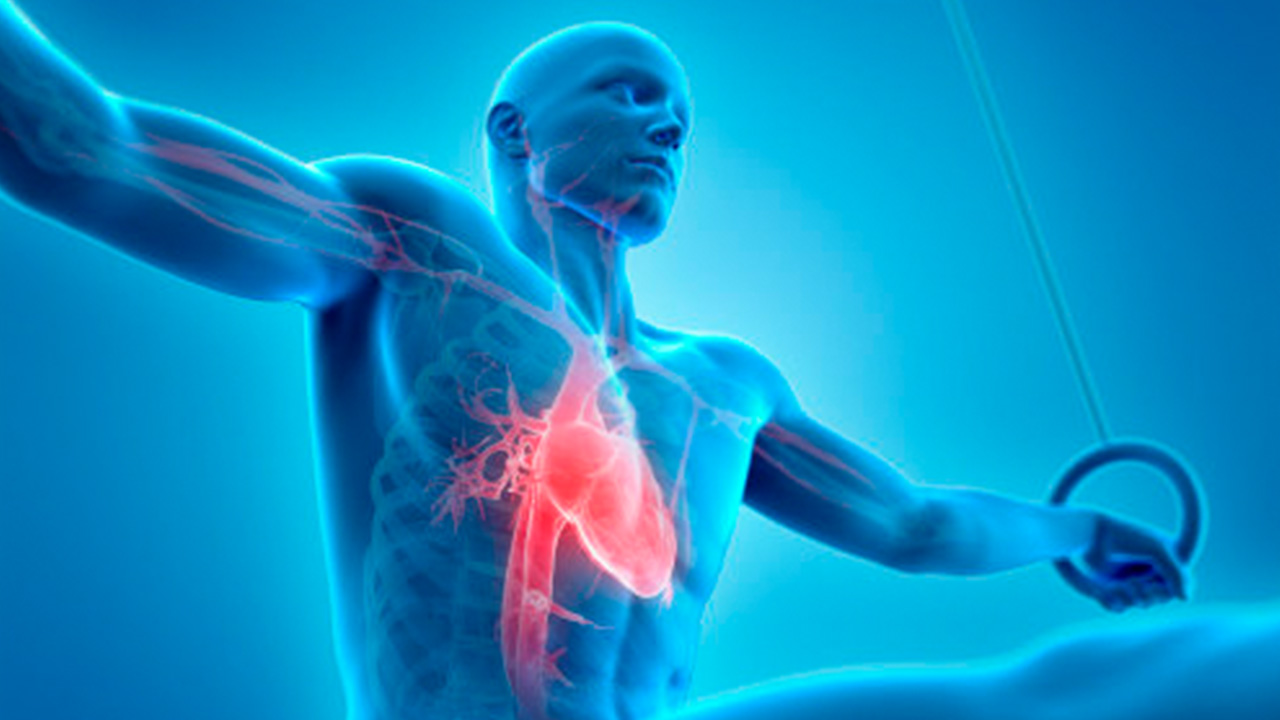

In [16]:
from IPython.display import Image
Image(filename="chest_pain.jpg", width=400, height=400)

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

heart = pd.read_csv("heart.csv")


    After coming across a dataset investigating various types of heart disease, I found interesting discrepancies in the data concerning Exercised Induced Angina (EIA, for the purposes of this report). I propose further research to determine whether both the sex and resting blood presure of an individual is indeed predictive of developing EIA, or if other factors like age, location, bad sample size, and other qualitative factors are to blame for the discrepancy.

Information about the data:
- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
- The data comes from Cleveland's Mayo Clinic, yet the patient home locations are unknown.
- Downloaded from Kaggle

Before continuing, it is important to establish the same vocabulary for a few key terms.

Exercised Induced Angina: Angina is generally caused from not getting enough blood through the arteries to supply the walls of the heart with enough blood flow to adequately pump. This condition is specifically brought on by exercise.

Resting Blood Pressure (RBS): Optimal blood pressure typically is defined as 120 mm Hg systolic (which is the pressure as your heart beats) over 80 mm Hg diastolic (which is the pressure as your heart relaxes). For your resting heart rate, the target is between 60 and 100 beats per minute (bpm).

## Problem #1: Inconsistent Sample Size between Men & Women

The first thing I noticed when exploring the data was that Women in the dataset had higher blood pressure than Men did and were more likely to have EIA. 

Text(28.8291,0.5,'Resting Blood Pressure (RBS)')

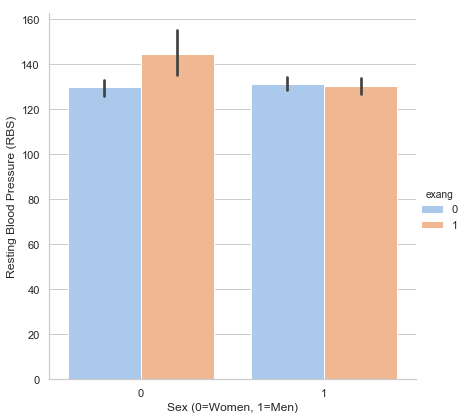

In [124]:
sns.set(style="whitegrid")
sex_exang = sns.catplot(x="sex", y="trestbps", hue="exang", data=heart,
                   height=6, kind="bar", palette="pastel", ci=95)
plt.xlabel("Sex (0=Women, 1=Men)")
plt.ylabel("Resting Blood Pressure (RBS)")

I then looked at the sample size between men & women to see if there was a descrepancy since the variation among women was much larger than it was with men.

In [125]:
#how many men vs women sampled
men_count=heart.sex.value_counts()[1]
women_count=heart.sex.value_counts()[0]
print("# of men sampled: " + str(men_count))
print("# of women sampled: " + str(women_count))

# of men sampled: 207
# of women sampled: 96


As it turns out, the samples were not equal by a nearly 2:1 ratio. The sample for men was more stable than it was for women. 

## Problem #2: A Discrepancy in the Number of EIA cases by Sex

I determined the total number of EIA cases in the dataset.

99 people were positively diagnosed cases of EIA while 204 had a negative diagnosis.

In [126]:
#chart of people with exang, 
men_exang=heart.exang.value_counts()[1]
# 1 in [] = men
women_exang=heart.exang.value_counts()[0]
# 0 in [] = women
print("# of people w/ EIA: " + str(men_exang))
print("# of people w/o EIA: " + str(women_exang))

# of people w/ EIA: 99
# of people w/o EIA: 204


Once broken down by gender, there is a much starker difference between them.

In [131]:
heart.groupby('sex')['exang'].value_counts()
#grouped by sex given the variable exang (# of cases with EIA)

sex  exang
0    0         74
     1         22
1    0        130
     1         77
Name: exang, dtype: int64

22 of the 74 female cases (29.72%) had EIA while 59.23% of men did.

This begs the question--what is to blame for the difference between the sexes. Since the male sample size is much larger than the female one, it has less variability and is perhaps a more accurate. If in fact true, this poses an interesting problem to investigate.

## Problem #3: Resting Heart Rate vs. Maximum Heart Rate 

Given that the sample size between men and women is not controlled, I wanted to visualize the variation between the samples across a few key metrics like Resting Blood Pressure (RBP) and Maximum Blood Pressure (MBP). 

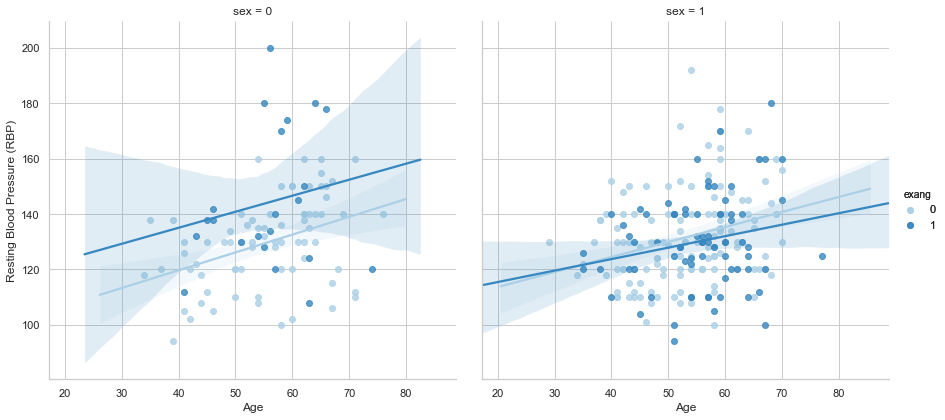

In [127]:
#linear regression + Facetgrid
facets = sns.lmplot(data=heart, x="age", y="trestbps", col="sex", hue="exang", palette="Blues", height=6)
facets.add_legend()
facets = (facets.set_axis_labels("Age", "Resting Blood Pressure (RBP)"))

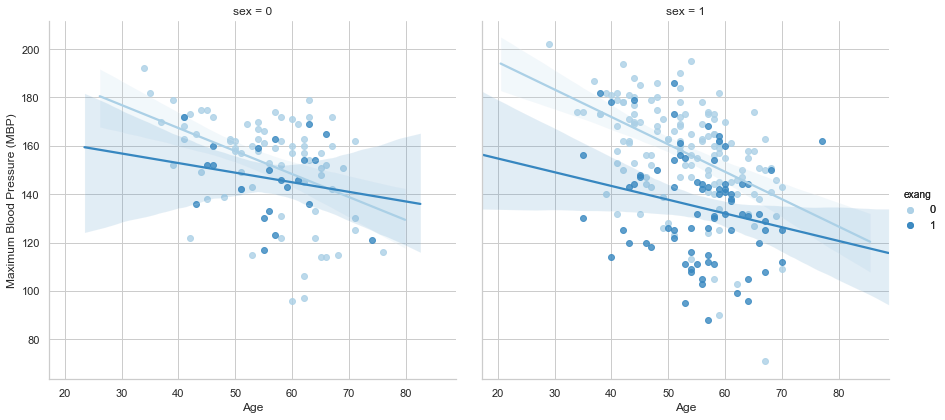

In [128]:
facets = sns.lmplot(data=heart, x="age", y="thalach", col="sex", hue="exang", palette="Blues", height=6)
facets.add_legend()
facets = (facets.set_axis_labels("Age", "Maximum Blood Pressure (MBP)"))

There were a few key findings:
    1. For RBP, there was significantly more variation in the female sample.
    2. For MBP, the male sample was significantly less clustered than the female sample
    
If the sample size for men and women were controlled it would be intereseted to see if either RBP or MBP could be a better predictor of EIA.  

## Issue

    EIA is considered an early identifier for more serious chronic heart diseases in the future. A better understanding of these leading indicators can improve our society's health, increase individual lifespans, reduce expensive chronic illnesses at hospitals, and ensure the highly-experienced staff keep working on the top tier of medical work. The focus should then be on catching these conditions early, and if we can empower doctor's during annual check-ups to easily screen for these conditions we can make these downstream improvements for both the patient and the healthcare system.
    
    Because these types of conditions are more difficult to diagnose early than something more serious like a heart attack, the goal should be for doctors to categorize patients as "at risk" for EIA and suggest more detailed tests that can properly diagnose. This dataset suggests there may be a link between EIA and either the patients' resting heartrate (RBP) and maximum blood pressure (MBP).
    
    This key question, however, is muddled by a dataset that samples men to women 2:1. Perhaps due to the size of the female dataset, there is a much higher degree of variabililty among women than men. If a sample could be properly controlled for both men and women, it would help understand if EIA could be diagnosed in one or both sexes.

## Hypothesis

    My hypothesis is that once the sample for men & women are controlled, variables like RBS and MBS affect the sexes differently and can be predictive of EIA. 
    
    The null hypothesis is that even when controlled, a person's sex makes no difference in assessing the likelihood of whether someone has EIA. 

## Rollout Plan, Phase I - Preparation & Execution

    The first step to would be expand the experiment's reach to various other cardiac units across the country. The key metric is getting access to several thousand patient records in at least 10 clinics/hospitals in order to get the proper sample size among both men and women. Ideally, hospitals/clinics are distributed as best as possible geographically. 
      Once the number of men and women are controlled, the variable of interest is the "exang" variable signifying the number of cases of EIA. Secondary variables to watch closely are MBS and RBS since they are a byproduct of the heart's state in a controlled situation. We will measure these variables with the various hospitals over the course of 6 months and compare it to the data found in this data set. 

## Rollout Plan, Phase II - Evaluation 

    The baseline values in this dataset were that 29.72% of women had EIA while 59.23% of men did. 
    
        - If the percentage of men and women both stay within half of one standard deviation of their respective baselines after 6 months, then conclude that a patient's sex is a reliable factor.
        - If only one of the sexes stays within one standard deviation and the other moves positively or negatively by more than 15%, extend the experiment for both sexes another 6 months. If the results are repeated a second time, conclude that only one of the sexes is more predictive of EIA. In this case, another experiment will need to be developed for the other sex. 
        - If both sexes move more than 15% of their baselines, then stop the experiment. Study the data and start a new investigation since there is another variable other than sex that is creating such varied movement in the diagnosis.
        - In all cases, conducts T-test to measure the meangingfulness of the differences between the likelihood of EIA in both men and women. 

## Conclusion

    It is not uncommon for someone's sex to make that person more at-risk for a condition. There are many times where it is not a factor at all. The hope of this test is to help us get more directionally accurate towards one or the other. 
    If sex is a factor, what about being a man or women increases those odds? Are those factors shared with the other sex given another variable? 
    If sex isn't a factor, then we can begin to understand what circumstancial or environmental factors may be at play.